## What is ML?

Machine learning is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence

In [ ]:
    why?


## Types of ML

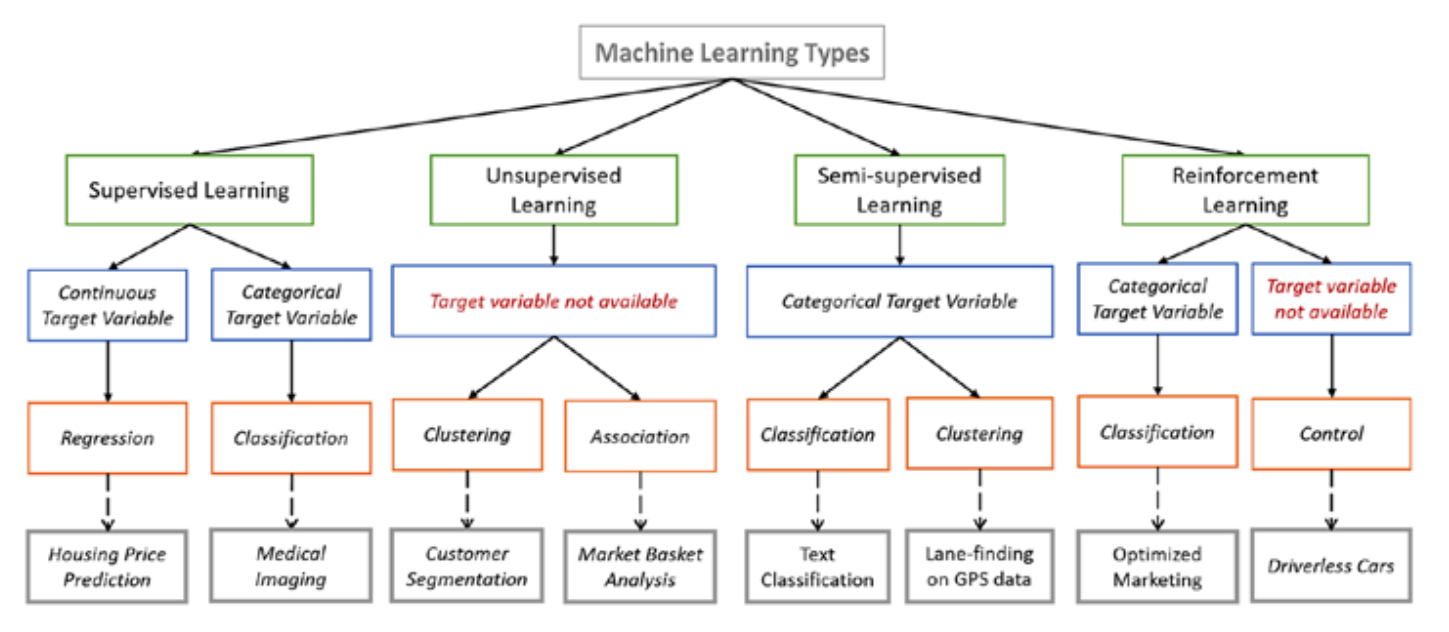

In [1]:
from IPython.display import Image

Image("type_of_ml.png",width = 800)

## Basic Requirements for a ML model

# Journey Of ML 

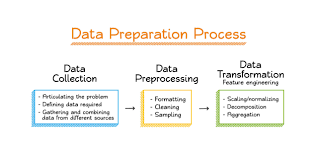

In [27]:
Image("Datacleaningsteps.png",  width = 700)

## Steps of ML

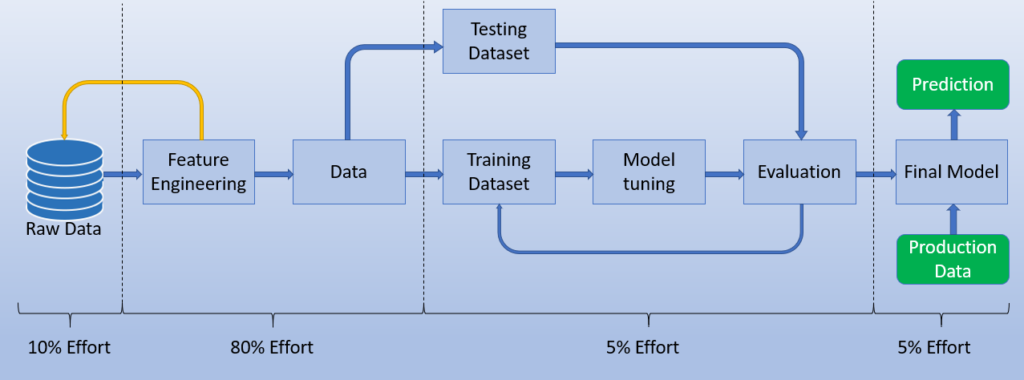

In [21]:
Image("mlsteps-1024x380.png")

- Data Preparation  
    - Missing Imputation    
    - Normalizing   
    - Dummy creation   
    - Variable Reduction   
    - EDA   
    - Model Iterations  
    

Bias-Variance Tradeoff  
A fundamental problem with supervised learning is the bias-variance tradeoff. Ideally a model should have two key characteristics

1) sensitive enough to accurately capture the key patterns in the training dataset,

2) at the same time it should be generalized enough to work well on any unseen datasets.

Unfortunately, whilst trying to achieve the afore mentioned first point, there is ample chances of over-fitting to noisy or unrepresentative training data points leading to a failure of generalizing the model. On the other hand, trying to generalize model may result in failing to capture important regularities.

Bias
If a model accuracy is low on training dataset as well as test dataset the model is said to be underfitting or model has high biase. This means the model is not fitting the training dataset points well in regression or decision boundary is not separating the classes well in classification, and two key reasons for bias is 1) not including the right features 2) not picking the correct order of polynomial degree for model fitting.

To solve underfitting issue or to reduced bias try including more meaningful features and try to increase the model complexity by trying higher order polynomial fittings.

Variance
If a model is giving high accuracy on training dataset, however on test dataset the accuracy drops drastically then the model is said to be overfitting or model has high variance. The key reason for overfitting is using higher order polynomial degree (may not be required), which will fit decision boudary tool well to all data points including the noise of train dataset, instead of the underlying relationship. This will lead to a high accuracy (actual vs predicted) in train dataset and when applied to the test dataset the prediction error will be high.

To solve over-fitting issue:

try to reduce the number of features i.e., keep only the meanigful features or try regularization methods which will keep all the features however reduce the magnitude of the feature parameter
Dimension reduction can eliminate noisy features, in turn reducing the model variance
Brining more data points to make training dataset large will also reduce variance
Choosing right model paramters can help to reduce the bias and variance, for example
Using right regularization parameters can decrease variance in regression based models
For a decision tree reducing the depth of the decision tree will reduce the variance

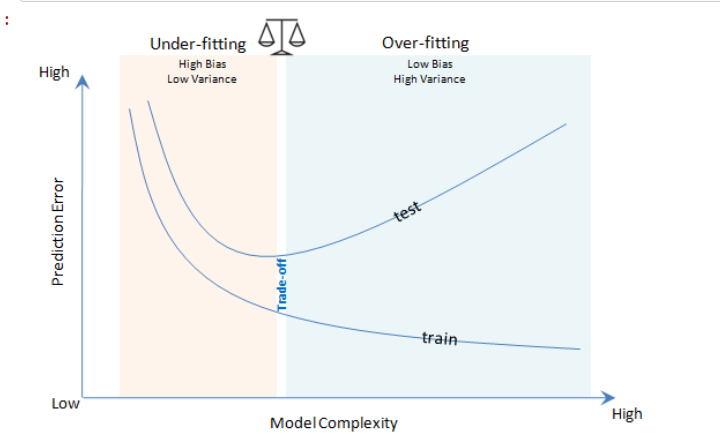

In [29]:
from IPython.display import Image 
Image("Bias-variance.PNG")

In [30]:
#Reading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc    

# Data Load

In [292]:
df = pd.read_csv("../Project/HassleFree/Caregiver Propensity Model/Data/selected_variables.csv", sep = ",")
df = df.sample(50000)

df.columns

Index(['Unnamed: 0', 'caregiver_fg', 'hrm_cyr', 'cbp', 'aba', 'col', 'coaps',
       'coafsa', 'coamr', 'cdca1c9',
       ...
       'aall', 'awgh', 'assimil', 'agblood', 'ailm', 'agweight', 'agvsn',
       'agdiab', 'ahch', 'agpsyco'],
      dtype='object', length=104)

In [293]:
df.shape

(50000, 104)

In [294]:
df.head()

,Unnamed: 0,caregiver_fg,hrm_cyr,cbp,aba,col,coaps,coafsa,coamr,cdca1c9,...,aall,awgh,assimil,agblood,ailm,agweight,agvsn,agdiab,ahch,agpsyco
400649,400650,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20781,20782,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
350297,350298,0,1,0,1,0,0,0,0,0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257048,257049,0,1,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352864,352865,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
df1 = df.drop('caregiver_fg', axis = 1)
y = df.caregiver_fg

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Before using sratify parameter
X_train, X_test, y_train, y_test = train_test_split(df1,y,test_size = 0.3)

In [296]:
def event_func(df,output,col):
    member_cnt=len(df)
    event_cnt=sum(output)
    
    print("\n \t\t\tEvent Rate by ",col)
    df1=pd.crosstab(df[col],output).reset_index()
    df1.columns=[col,'Non_Event','Event']
    df1['Total']=df1['Non_Event']+df1['Event']
    df1['Perc_Members']=df1['Total']/member_cnt
    df1['Perc_Event']=df1['Event']/event_cnt
    df1['Event_Rate']=df1['Event']/df1['Total']
    df1.drop(['Non_Event'],axis=1,inplace=True)
    
    return df1

def event_chart(data,col): 
    Event_plt=plt.bar(data[col],data['Event'],bottom=(data['Total']-data['Event']))
    Non_Event_plt=plt.bar(data[col],(data['Total']-data['Event']))
    plt.legend(['Event','Non_Event'])
    plt.xticks(rotation=45)
    for x,y,l in zip(data[col],data.Total,data.Event_Rate):
        label = "{:.1f}%".format(l*100)
        plt.text(x,y,label, ha='center')
    plt.show()

In [297]:
num_var=list(df[0:1].select_dtypes(include=['int64','float64']).columns.values)
cat_var=list(df[0:1].select_dtypes(include=['object']).columns.values)


 			Event Rate by  gender


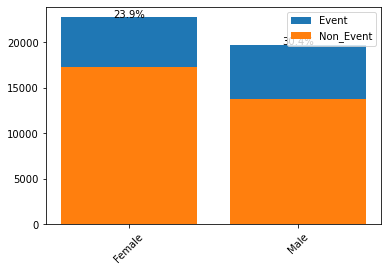


 			Event Rate by  ok_to_call


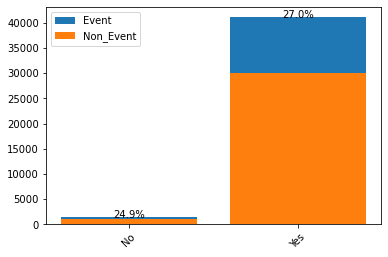


 			Event Rate by  ok_to_mail


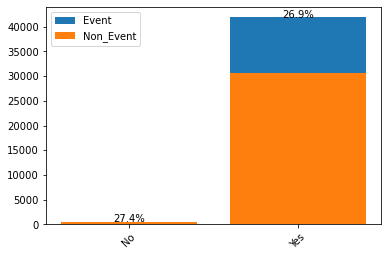


 			Event Rate by  ok_to_contact


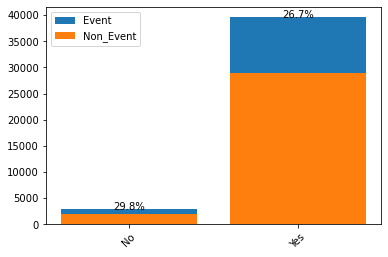


 			Event Rate by  mmr_medicaid_fg


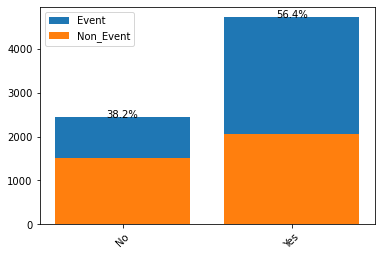


 			Event Rate by  has_online_access


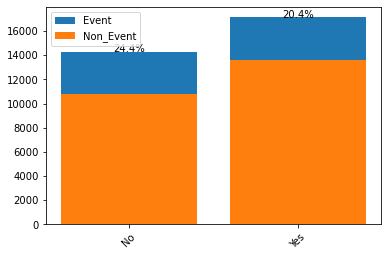


 			Event Rate by  is_retired


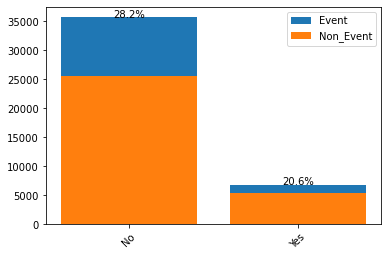


 			Event Rate by  state


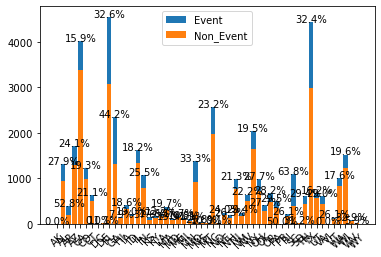


 			Event Rate by  estimated_networth


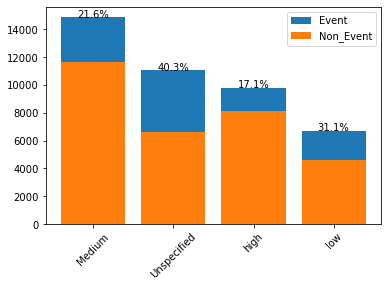


 			Event Rate by  estimated_income


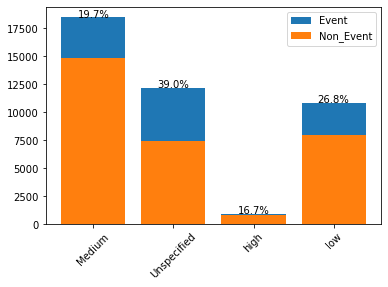


 			Event Rate by  estimated_debt


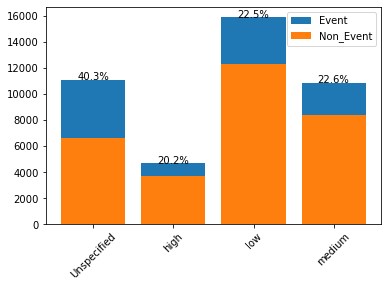


 			Event Rate by  education_status


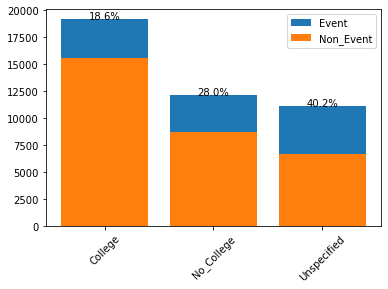


 			Event Rate by  occupation


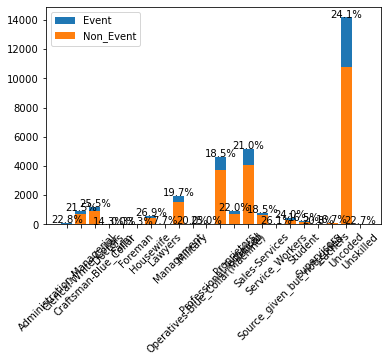


 			Event Rate by  homeowner_status


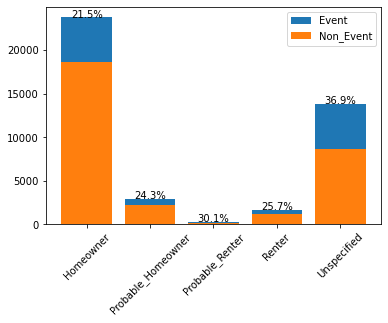

In [298]:
for x in cat_var:
    df1 = event_func(df, df.caregiver_fg, x)
    event_chart(df1, x)

Variable : hrm_cyr


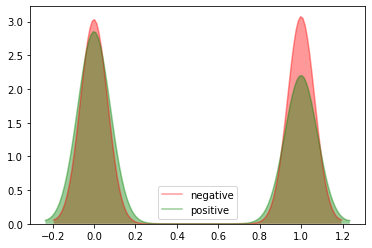

In [299]:
for x in num_var[2:3]:
    print("Variable :", x)
    sns.kdeplot(df[df.caregiver_fg == 0][x], alpha = 0.4, color = "r", label = "negative", shade_lowest=False, shade  = True)
    sns.kdeplot(df[df.caregiver_fg == 1][x], alpha = 0.4, color = "g", label = "positive", shade_lowest=False, shade  = True)
    plt.show()
 

In [301]:
def describe(df, num_var):
    temp_summary=pd.DataFrame(df[num_var].describe().T)
    from scipy.stats import mode
    mod=mode(df[num_var],axis=0)[0].flatten()
    temp_summary['mode']=mod.tolist()

    temp_summary['skewness']=df[num_var].skew() #Skewness
    temp_summary['kurtosis']=df[num_var].kurtosis() #kurtosis

    #Missing values
    temp_summary['missing']=df[num_var].isnull().sum() #Number of missing values
    temp_summary['perc_missing']=df[num_var].isnull().sum()/len(df[num_var]) #Percentage of missing values

    return temp_summary


describe(df, num_var)

,count,mean,std,min,25%,50%,75%,max,mode,skewness,kurtosis,missing,perc_missing
Unnamed: 0,50000.0,204120.616620,117954.062185,5.0,102344.5,203713.5,306456.0,407805.0,5.0,0.003389,-1.206776,0,0.0000
caregiver_fg,50000.0,0.271680,0.444830,0.0,0.0,0.0,1.0,1.0,0.0,1.026590,-0.946151,0,0.0000
hrm_cyr,50000.0,0.485060,0.499782,0.0,0.0,0.0,1.0,1.0,0.0,0.059788,-1.996505,0,0.0000
cbp,50000.0,1.071700,2.747906,0.0,0.0,0.0,0.0,9.0,0.0,2.498577,4.360091,0,0.0000
aba,50000.0,0.301040,0.458715,0.0,0.0,0.0,1.0,1.0,0.0,0.867502,-1.247490,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
agweight,38020.0,0.238033,0.425885,0.0,0.0,0.0,0.0,1.0,0.0,1.230291,-0.486409,11980,0.2396
agvsn,38020.0,0.202788,0.402081,0.0,0.0,0.0,0.0,1.0,0.0,1.478446,0.185812,11980,0.2396
agdiab,38020.0,0.168753,0.374539,0.0,0.0,0.0,0.0,1.0,0.0,1.768918,1.129129,11980,0.2396
ahch,38020.0,0.169569,0.375258,0.0,0.0,0.0,0.0,1.0,0.0,1.761180,1.101813,11980,0.2396


In [302]:
#Missing Value Imputation
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [303]:
print("Training data missing values before imputation:" , X_train.isnull().sum().sum())
print("Test data missing values before imputation:" , X_test.isnull().sum().sum())

MissingImputer=DataFrameImputer().fit(X_train)

#from sklearn.externals import joblib
#joblib.dump(MissingImputer, "MissingImputer.pkl")

X_train1=MissingImputer.transform(X_train)
X_test1=MissingImputer.transform(X_test)

#X_train.fillna(0,inplace=True)
#X_test.fillna(0,inplace=True)

print("Training data missing values before imputation:" , X_train1.isnull().sum().sum())
print("Test data missing values before imputation:" , X_test1.isnull().sum().sum())

Training data missing values before imputation: 325176
Test data missing values before imputation: 137123
Training data missing values before imputation: 0
Test data missing values before imputation: 0


In [304]:
def create_dummies(df,cat_vars):
    #print("Variable list before :",df.columns)
    for var in cat_vars:
        cat_list='var'+'_'+var
        #cat_list = pd.get_dummies(df[var], prefix=var,drop_first=True)
        cat_list = pd.get_dummies(df[var], prefix=var)
        df1=df.join(cat_list)
        df=df1
        
        df_vars=df.columns.values.tolist()
        to_keep=[i for i in df_vars if i not in cat_vars]
        
        df_final=df[to_keep]
    #print("Variable list After :",df_final.columns)
    return df_final

In [309]:
#Creating dummies

print("\nFeatures before Dummy Variable Creation : ", X_train1.columns)

print("Number of Numeric Variables :",len(num_var))
print("Numeric Variable List :", num_var)

print("Number of categorical Variables :",len(cat_var))
print("Categorical Variable List :", cat_var)

X_train2=create_dummies(X_train1,cat_var)
X_test2=create_dummies(X_test1,cat_var)

print("\nFeatures After Dummy Variable Creation : ", len(X_train2.columns))



Features before Dummy Variable Creation :  Index(['Unnamed: 0', 'hrm_cyr', 'cbp', 'aba', 'col', 'coaps', 'coafsa',
       'coamr', 'cdca1c9', 'cdcnep',
       ...
       'aall', 'awgh', 'assimil', 'agblood', 'ailm', 'agweight', 'agvsn',
       'agdiab', 'ahch', 'agpsyco'],
      dtype='object', length=103)
Number of Numeric Variables : 90
Numeric Variable List : ['Unnamed: 0', 'caregiver_fg', 'hrm_cyr', 'cbp', 'aba', 'col', 'coaps', 'coafsa', 'coamr', 'cdca1c9', 'cdcnep', 'cdceye', 'mad_cyr', 'bcs', 'mplm', 'amm', 'copd.x', 'pceb', 'pcesc', 'art', 'omwx', 'omw', 'hhld_mbrs_19_20', 'hhld_mbrs_overall', 'need_wheelchair', 'mobility_issue', 'Others', 'transportation', 'Bath_clim', 'Dressing', 'Eating_ADL', 'managing_medication', 'ip_diag_others', 'ip_diag_resp_sys', 'ip_diag_nervous_sys', 'ip_diag_genitourinary_sys', 'ip_diag_circulatory_sys', 'ip_diag_neoplasms', 'ip_diag_residual_codes', 'age_yrs', 'tenure_yrs', 'fitness_intrst', 'online_catalog_buyer', 'online_purchaser', 'subsidy_lev

In [306]:
def cat_summary(data):
    cat_var=list(data[0:1].select_dtypes(include=['object']).columns.values)
    
    temp=data[cat_var]
    
    temp1=create_dummies(temp,cat_var)

    #5 point summary
    temp_summary=pd.DataFrame(temp1.describe().T)
    temp_summary

    #counts
    temp_summary['value_count']=temp1.sum() #counts
    temp_summary['perc_count']=temp1.sum()/len(temp1) #percent count
    temp_summary
    
    return temp_summary    

#Bi-variate Analysis

def cat_bivariate(data,Y):
    cat_var=list(data[0:1].select_dtypes(include=['object']).columns.values)
    
    temp=data[cat_var]
    
    temp1=create_dummies(temp,cat_var)

    #5 point summary
    temp_summary=pd.DataFrame(temp1.describe().T)
    temp_summary

    #counts
    temp_summary['value_count']=temp1.sum() #counts
    temp_summary['perc_count']=temp1.sum()/len(temp1) #percent count
    
    temp_summary['event_count']=temp1.loc[Y==1].sum() #counts
    temp_summary['perc_event_count']=temp1.loc[Y==1].sum()/temp1.loc[Y==1].sum().sum()
    temp_summary['event_Rate']=temp_summary['event_count']/temp_summary['value_count']
    
    return temp_summary

def EDA_Imp(data,y,Imp_var):
    print("EDA on Important Variables")
    for i in range(len(Imp_var)):
        if len(data[Imp_var[i]].value_counts())<=10:
            temp=event_func(data,y,Imp_var[i])
            print(temp)
            event_chart(temp,Imp_var[i])

        else :
            data['var']=pd.qcut(data[Imp_var[i]], q=10,duplicates='drop')
            data['var']=data.astype({'var': str})
            temp=event_func(data,y,'var')
            print(temp)
            event_chart(temp,'var')
            
            

In [310]:
cat_summary(X_test1)

,count,mean,std,min,25%,50%,75%,max,value_count,perc_count
gender_Female,15000.0,0.607733,0.488272,0.0,0.0,1.0,1.0,1.0,9116,0.607733
gender_Male,15000.0,0.392267,0.488272,0.0,0.0,0.0,1.0,1.0,5884,0.392267
ok_to_call_No,15000.0,0.027200,0.162671,0.0,0.0,0.0,0.0,1.0,408,0.027200
ok_to_call_Yes,15000.0,0.972800,0.162671,0.0,1.0,1.0,1.0,1.0,14592,0.972800
ok_to_mail_No,15000.0,0.011467,0.106470,0.0,0.0,0.0,0.0,1.0,172,0.011467
...,...,...,...,...,...,...,...,...,...,...
homeowner_status_Homeowner,15000.0,0.628067,0.483337,0.0,0.0,1.0,1.0,1.0,9421,0.628067
homeowner_status_Probable_Homeowner,15000.0,0.060467,0.238357,0.0,0.0,0.0,0.0,1.0,907,0.060467
homeowner_status_Probable_Renter,15000.0,0.005333,0.072837,0.0,0.0,0.0,0.0,1.0,80,0.005333
homeowner_status_Renter,15000.0,0.032000,0.176006,0.0,0.0,0.0,0.0,1.0,480,0.032000


In [311]:
cat_bivariate(X_test1, y_test)

,count,mean,std,min,25%,50%,75%,max,value_count,perc_count,event_count,perc_event_count,event_Rate
gender_Female,15000.0,0.607733,0.488272,0.0,0.0,1.0,1.0,1.0,9116,0.607733,2301,0.040068,0.252413
gender_Male,15000.0,0.392267,0.488272,0.0,0.0,0.0,1.0,1.0,5884,0.392267,1801,0.031361,0.306084
ok_to_call_No,15000.0,0.027200,0.162671,0.0,0.0,0.0,0.0,1.0,408,0.027200,106,0.001846,0.259804
ok_to_call_Yes,15000.0,0.972800,0.162671,0.0,1.0,1.0,1.0,1.0,14592,0.972800,3996,0.069583,0.273849
ok_to_mail_No,15000.0,0.011467,0.106470,0.0,0.0,0.0,0.0,1.0,172,0.011467,46,0.000801,0.267442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
homeowner_status_Homeowner,15000.0,0.628067,0.483337,0.0,0.0,1.0,1.0,1.0,9421,0.628067,2174,0.037856,0.230761
homeowner_status_Probable_Homeowner,15000.0,0.060467,0.238357,0.0,0.0,0.0,0.0,1.0,907,0.060467,214,0.003726,0.235943
homeowner_status_Probable_Renter,15000.0,0.005333,0.072837,0.0,0.0,0.0,0.0,1.0,80,0.005333,18,0.000313,0.225000
homeowner_status_Renter,15000.0,0.032000,0.176006,0.0,0.0,0.0,0.0,1.0,480,0.032000,117,0.002037,0.243750


EDA on Important Variables

 			Event Rate by  hrm_cyr
   hrm_cyr  Event  Total  Perc_Members  Perc_Event  Event_Rate
0        0   2346   7710         0.514    0.571916    0.304280
1        1   1756   7290         0.486    0.428084    0.240878


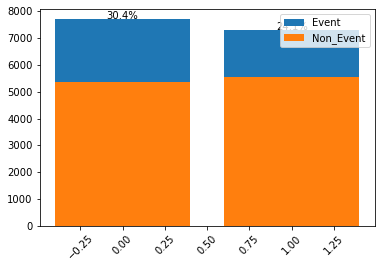

In [312]:
EDA_Imp(X_test1,y_test,num_var[2:3])

In [317]:
X_test2['state_PR'] = 0
X_test2['occupation_Farm'] = 0 
X_test2['state_VI'] = 0

In [320]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit(X_train3)

#joblib.dump(mm_scaler, "Data/scaler.pkl")

X_train4=mm_scaler.transform(X_train3)
X_test4=mm_scaler.transform(X_test3)

X_train5 = pd.DataFrame(X_train4,columns=X_train3.columns)
X_test5  = pd.DataFrame(X_test4,columns=X_test3.columns)
#mm_scaler.transform(X_test)
#from sklearn.externals import joblib

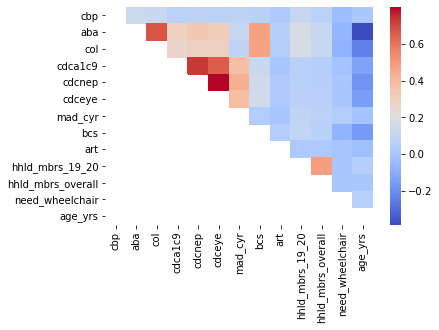

In [321]:
corr_matrix=X_train5.iloc[:,2:15].corr()
#corr_matrix.to_csv('C:/Work/hasslefree/2019_OEP_Retention/model/IBcalls_Abrasion_correlation_matrix.csv')

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))

sns.heatmap(upper, cmap = "coolwarm")
plt.show()

In [322]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['cdcnep', 'cdceye']

In [323]:
X_train5.drop(to_drop,axis=1, inplace = True)
X_test5.drop(to_drop,axis=1, inplace = True)

In [324]:
X_train5.isnull().sum().sum()

0

In [ ]:
X_train5.to_csv("clean_data.csv",index_col=False)

In [326]:
#Model building
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train5,y_train)

C:\Users\agupta82\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [339]:
confusion_matrix(y_train, logmodel.predict(X_train5))

array([[25180,   338],
       [ 6476,  3006]], dtype=int64)

In [342]:
confusion_matrix(y_test, logmodel.predict(X_test5))

array([[10757,   141],
       [ 2806,  1296]], dtype=int64)